In [2]:
import pandas as pd
import numpy as np
# Assuming you have a DataFrame named 'd' or modify this line to load your data
df = pd.read_csv('Assets/final_dataset.csv')



In [3]:
from sklearn.feature_selection import VarianceThreshold
X=df.drop(['SUBJECT_ID','SESSION_ID','TRIAL_ID','CLASS_LABEL'], axis=1)
y=df['CLASS_LABEL']

In [4]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((95167, 1010), (40787, 1010))

In [5]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)


VarianceThreshold(threshold=0)

In [6]:
var_thres.get_support()

array([False,  True,  True, ...,  True,  True,  True])

In [7]:
### Finding non constant features
sum(var_thres.get_support())

1008

In [8]:
# Lets Find non-constant features 
len(X_train.columns[var_thres.get_support()])

1008

In [9]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

2


In [10]:
for column in constant_columns:
    print(column)

COP_AP_PRO_1
COP_AP_PRO_1.1


In [11]:
X_train.drop(constant_columns,axis=1, inplace=True)

In [12]:
import matplotlib.pyplot as plt


<Axes: >

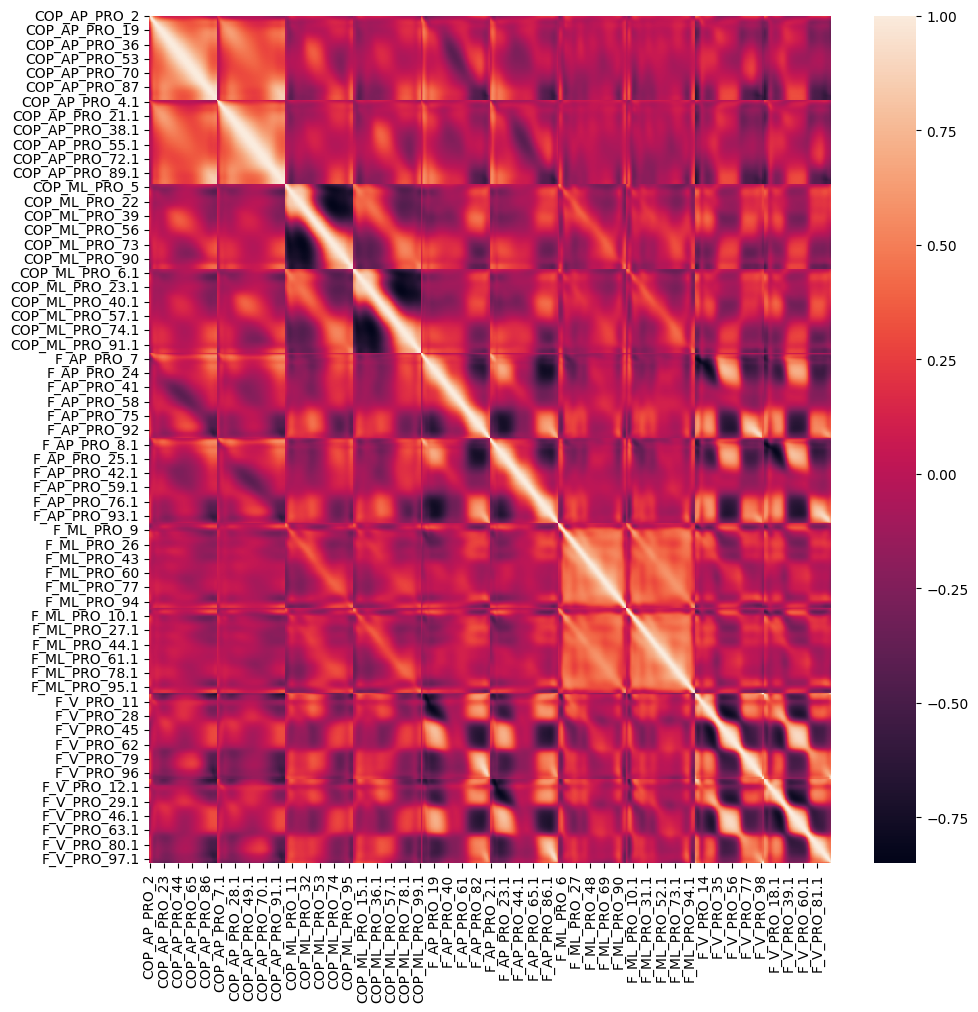

In [13]:
import seaborn as sns
#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [14]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X_train, 0.95)
len(set(corr_features))

985

In [15]:

corr_features

{'COP_AP_PRO_10',
 'COP_AP_PRO_10.1',
 'COP_AP_PRO_100',
 'COP_AP_PRO_100.1',
 'COP_AP_PRO_101',
 'COP_AP_PRO_101.1',
 'COP_AP_PRO_11',
 'COP_AP_PRO_11.1',
 'COP_AP_PRO_12',
 'COP_AP_PRO_12.1',
 'COP_AP_PRO_13',
 'COP_AP_PRO_13.1',
 'COP_AP_PRO_14',
 'COP_AP_PRO_14.1',
 'COP_AP_PRO_15',
 'COP_AP_PRO_15.1',
 'COP_AP_PRO_16',
 'COP_AP_PRO_16.1',
 'COP_AP_PRO_17',
 'COP_AP_PRO_17.1',
 'COP_AP_PRO_18',
 'COP_AP_PRO_18.1',
 'COP_AP_PRO_19',
 'COP_AP_PRO_19.1',
 'COP_AP_PRO_20',
 'COP_AP_PRO_20.1',
 'COP_AP_PRO_21',
 'COP_AP_PRO_21.1',
 'COP_AP_PRO_22',
 'COP_AP_PRO_22.1',
 'COP_AP_PRO_23',
 'COP_AP_PRO_23.1',
 'COP_AP_PRO_24',
 'COP_AP_PRO_24.1',
 'COP_AP_PRO_25',
 'COP_AP_PRO_25.1',
 'COP_AP_PRO_26',
 'COP_AP_PRO_26.1',
 'COP_AP_PRO_27',
 'COP_AP_PRO_27.1',
 'COP_AP_PRO_28',
 'COP_AP_PRO_28.1',
 'COP_AP_PRO_29',
 'COP_AP_PRO_29.1',
 'COP_AP_PRO_30',
 'COP_AP_PRO_30.1',
 'COP_AP_PRO_31',
 'COP_AP_PRO_31.1',
 'COP_AP_PRO_32',
 'COP_AP_PRO_32.1',
 'COP_AP_PRO_33',
 'COP_AP_PRO_33.1',
 'COP_AP

In [18]:
print(list(X_train.drop(corr_features,axis=1).columns))

['COP_AP_PRO_2', 'COP_AP_PRO_3', 'COP_AP_PRO_2.1', 'COP_AP_PRO_3.1', 'COP_ML_PRO_1', 'COP_ML_PRO_1.1', 'F_AP_PRO_1', 'F_AP_PRO_2', 'F_AP_PRO_3', 'F_AP_PRO_1.1', 'F_AP_PRO_2.1', 'F_AP_PRO_3.1', 'F_ML_PRO_1', 'F_ML_PRO_2', 'F_ML_PRO_8', 'F_ML_PRO_9', 'F_ML_PRO_1.1', 'F_ML_PRO_2.1', 'F_ML_PRO_8.1', 'F_ML_PRO_9.1', 'F_V_PRO_1', 'F_V_PRO_2', 'F_V_PRO_2.1']


In [ ]:
'COP_AP_PRO_2', 'COP_AP_PRO_3', 'COP_AP_PRO_2.1', 'COP_AP_PRO_3.1', 'COP_ML_PRO_1', 'COP_ML_PRO_1.1', 
'F_AP_PRO_1', 'F_AP_PRO_2', 'F_AP_PRO_3', 'F_AP_PRO_1.1', 'F_AP_PRO_2.1', 'F_AP_PRO_3.1', 'F_ML_PRO_1',
'F_ML_PRO_2', 'F_ML_PRO_8', 'F_ML_PRO_9', 'F_ML_PRO_1.1', 'F_ML_PRO_2.1', 'F_ML_PRO_8.1', 'F_ML_PRO_9.1', 
'F_V_PRO_1', 'F_V_PRO_2', 'F_V_PRO_2.1'

In [17]:
y_train.unique()

array([0, 1], dtype=int64)